 Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.
The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

### Importing packages and reading in the dataset

In [1]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#set jupyter to display up to 50 columns, so we can see everything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)

In [2]:
#Reading in the dataset
hotel_data= pd.read_csv("C:\\Users\\dell\\Downloads\\hotel_bookings.csv") #read in my data
hotel_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


### Cleaning and Exploration of the data

In [3]:
#Dropping the index column
hotel_data.drop(index=hotel_data.index[0], axis=0, inplace=True)
hotel_data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
5,INN00006,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [4]:
#checking the general information about the dataset
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36274 entries, 1 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36274 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [5]:
#check for the shape of the dataset
hotel_data.shape

(36274, 19)

In [6]:
#checking for missing values
hotel_data.isnull().sum()

Booking_ID                                 0
no_of_adults                             412
no_of_children                           323
no_of_weekend_nights                     366
no_of_week_nights                        806
type_of_meal_plan                        525
required_car_parking_space              2591
room_type_reserved                      1170
lead_time                                471
arrival_year                             377
arrival_month                            503
arrival_date                             980
market_segment_type                     1511
repeated_guest                           585
no_of_previous_cancellations             496
no_of_previous_bookings_not_canceled     549
avg_price_per_room                       459
no_of_special_requests                   788
booking_status                             0
dtype: int64

In [7]:
#To check for the categorical columns
categorical = hotel_data.dtypes[hotel_data.dtypes=='object'].index
hotel_data[categorical]

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled
4,INN00005,Not Selected,Room_Type 1,Online,Canceled
5,INN00006,Meal Plan 2,Room_Type 1,Online,Canceled
...,...,...,...,...,...
36270,INN36271,Meal Plan 1,NaN,Online,Not_Canceled
36271,INN36272,Meal Plan 1,Room_Type 1,Online,Canceled
36272,INN36273,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,INN36274,Not Selected,Room_Type 1,Online,Canceled


In [8]:
#To check information for the numerical columns
numerical = hotel_data.dtypes[hotel_data.dtypes!='object'].index
hotel_data[numerical]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,0.0,0.0,106.68,1.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,0.0,0.0,60.00,0.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,0.0,0.0,100.00,0.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,0.0,0.0,94.50,0.0
5,2.0,0.0,0.0,2.0,0.0,346.0,2018.0,9.0,13.0,0.0,0.0,0.0,115.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,NaN,0.0,85.0,2018.0,8.0,3.0,NaN,0.0,0.0,167.80,1.0
36271,2.0,0.0,1.0,3.0,0.0,228.0,2018.0,10.0,17.0,0.0,0.0,0.0,90.95,2.0
36272,2.0,0.0,2.0,6.0,0.0,148.0,2018.0,7.0,1.0,0.0,0.0,0.0,98.39,2.0
36273,2.0,0.0,0.0,3.0,0.0,63.0,2018.0,4.0,21.0,0.0,0.0,0.0,94.50,0.0


In [9]:
#Checking for unique values in some columns
hotel_data['type_of_meal_plan'].unique()

array(['Not Selected', 'Meal Plan 1', 'Meal Plan 2', nan, 'Meal Plan 3'],
      dtype=object)

In [10]:
hotel_data['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', nan, 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [11]:
hotel_data['market_segment_type'].unique()

array(['Online', 'Offline', 'Corporate', nan, 'Aviation', 'Complementary'],
      dtype=object)

In [12]:
#Statistical description of numerical variables
hotel_data[numerical].describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,35862.000000,35951.000000,35908.000000,35468.00000,33683.000000,35803.000000,35897.000000,35771.000000,35294.000000,35689.000000,35778.000000,35725.000000,35815.000000,35486.000000
mean,1.845017,0.105366,0.810209,2.20331,0.030698,85.276569,2017.820431,7.424031,15.605712,0.025666,0.023646,0.154458,103.418207,0.619343
std,0.518652,0.402871,0.870857,1.40989,0.172501,85.998845,0.383834,3.068277,8.743484,0.158140,0.370835,1.764805,35.057342,0.785849
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.00000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.00000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.00000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.00000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [13]:
#Statistical description of categorical data
hotel_data[categorical].describe()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36274,35749,35104,34763,36274
unique,36274,4,7,5,2
top,INN00002,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27421,27234,22264,24389


In [14]:
#Checking for duplicates
duplicates=hotel_data.duplicated()
duplicates
#No duplicated values in the dataset

1        False
2        False
3        False
4        False
5        False
         ...  
36270    False
36271    False
36272    False
36273    False
36274    False
Length: 36274, dtype: bool

In [15]:
#To know the percentage of missing values in each column)
percent_missing= hotel_data.isnull().sum()*100/len(hotel_data)
percent_missing

Booking_ID                              0.000000
no_of_adults                            1.135800
no_of_children                          0.890445
no_of_weekend_nights                    1.008987
no_of_week_nights                       2.221977
type_of_meal_plan                       1.447318
required_car_parking_space              7.142857
room_type_reserved                      3.225451
lead_time                               1.298451
arrival_year                            1.039312
arrival_month                           1.386668
arrival_date                            2.701660
market_segment_type                     4.165518
repeated_guest                          1.612725
no_of_previous_cancellations            1.367371
no_of_previous_bookings_not_canceled    1.513481
avg_price_per_room                      1.265369
no_of_special_requests                  2.172355
booking_status                          0.000000
dtype: float64

In [16]:
x= pd.DataFrame(hotel_data.groupby('room_type_reserved').Booking_ID.count()) #To know the count of room_type
x['room_type_reserved']=x.index
x
#Room_type 1 has the highest count, while room_type 3 has the least

,Booking_ID,room_type_reserved
room_type_reserved,,
Room_Type 1,27234,Room_Type 1
Room_Type 2,664,Room_Type 2
Room_Type 3,6,Room_Type 3
Room_Type 4,5851,Room_Type 4
Room_Type 5,256,Room_Type 5
Room_Type 6,939,Room_Type 6
Room_Type 7,154,Room_Type 7


[Text(0, 0, 'Room_Type 1'),
 Text(1, 0, 'Room_Type 2'),
 Text(2, 0, 'Room_Type 3'),
 Text(3, 0, 'Room_Type 4'),
 Text(4, 0, 'Room_Type 5'),
 Text(5, 0, 'Room_Type 6'),
 Text(6, 0, 'Room_Type 7')]

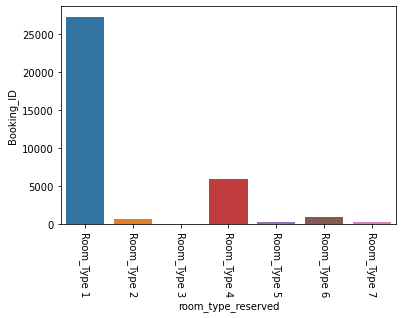

In [17]:
viz=sns.barplot(x ='room_type_reserved',y = 'Booking_ID', data=x) #Visualizing
viz.set_xticklabels(viz.get_xticklabels(), rotation= -90)

In [18]:
hotel_data.groupby('room_type_reserved').avg_price_per_room.mean() 
# room_type 7 has the highest mean avg_price_per_room, while room_type 3 has the least

room_type_reserved
Room_Type 1     95.892854
Room_Type 2     87.658222
Room_Type 3     64.291667
Room_Type 4    125.311431
Room_Type 5    124.171725
Room_Type 6    181.934193
Room_Type 7    153.662368
Name: avg_price_per_room, dtype: float64

In [19]:
y=pd.DataFrame(hotel_data.groupby('type_of_meal_plan').Booking_ID.count())#To know the counts of meal_plan
y['type_of_meal_plan']=y.index
y
# Meal_plan 1 has the highest  count while meal_plan 3 has the least, about 5000 bookings had 'Not selected'

,Booking_ID,type_of_meal_plan
type_of_meal_plan,,
Meal Plan 1,27421,Meal Plan 1
Meal Plan 2,3266,Meal Plan 2
Meal Plan 3,5,Meal Plan 3
Not Selected,5057,Not Selected


[Text(0, 0, 'Meal Plan 1'),
 Text(1, 0, 'Meal Plan 2'),
 Text(2, 0, 'Meal Plan 3'),
 Text(3, 0, 'Not Selected')]

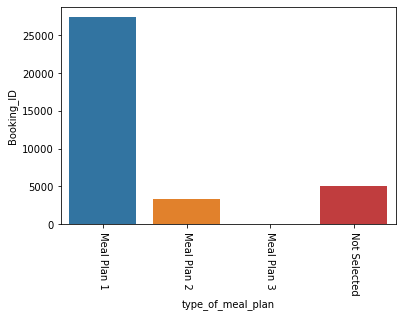

In [20]:
viz1=sns.barplot(x ='type_of_meal_plan',y = 'Booking_ID', data=y) #Visualizing
viz1.set_xticklabels(viz1.get_xticklabels(), rotation= -90)

In [21]:
#Dealing with missing values by filling in some important columns
hotel_data['room_type_reserved'].fillna(hotel_data['room_type_reserved'].mode()[0], inplace=True)
hotel_data['type_of_meal_plan'].fillna(hotel_data['type_of_meal_plan'].mode()[0], inplace=True)
hotel_data['market_segment_type'].fillna(hotel_data['market_segment_type'].mode()[0], inplace=True)
hotel_data['required_car_parking_space'].fillna(hotel_data['required_car_parking_space'].median(), inplace= True)
hotel_data['no_of_week_nights'].fillna(hotel_data['no_of_week_nights'].median(), inplace=True)
hotel_data['arrival_date'].fillna(hotel_data['arrival_date'].median(), inplace= True)
hotel_data['no_of_special_requests'].fillna(hotel_data['no_of_special_requests'].median(), inplace=True)
hotel_data.isnull().sum()

Booking_ID                                0
no_of_adults                            412
no_of_children                          323
no_of_weekend_nights                    366
no_of_week_nights                         0
type_of_meal_plan                         0
required_car_parking_space                0
room_type_reserved                        0
lead_time                               471
arrival_year                            377
arrival_month                           503
arrival_date                              0
market_segment_type                       0
repeated_guest                          585
no_of_previous_cancellations            496
no_of_previous_bookings_not_canceled    549
avg_price_per_room                      459
no_of_special_requests                    0
booking_status                            0
dtype: int64

In [22]:
hotel_data1=hotel_data.dropna(axis=0) #Dropping the rest of the missing value rows
hotel_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32627 entries, 1 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            32627 non-null  object 
 1   no_of_adults                          32627 non-null  float64
 2   no_of_children                        32627 non-null  float64
 3   no_of_weekend_nights                  32627 non-null  float64
 4   no_of_week_nights                     32627 non-null  float64
 5   type_of_meal_plan                     32627 non-null  object 
 6   required_car_parking_space            32627 non-null  float64
 7   room_type_reserved                    32627 non-null  object 
 8   lead_time                             32627 non-null  float64
 9   arrival_year                          32627 non-null  float64
 10  arrival_month                         32627 non-null  float64
 11  arrival_date   

In [23]:
#Dropping Booking_ID as it has no relevance to whether bookings will be cancelled or not
hotel_data2=hotel_data1.drop(['Booking_ID'], axis=1)
hotel_data2

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
5,2.0,0.0,0.0,2.0,Meal Plan 2,0.0,Room_Type 1,346.0,2018.0,9.0,13.0,Online,0.0,0.0,0.0,115.00,1.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,2.0,2.0,0.0,1.0,Meal Plan 1,0.0,Room_Type 6,0.0,2018.0,10.0,6.0,Online,0.0,0.0,0.0,216.00,0.0,Canceled
36271,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


In [24]:
#Transforming the hotel booking to numerical data where 'Not cancelled' is 1 and 'Cancelled' is 0 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
hotel_data2['booking_status']=le.fit_transform(hotel_data2['booking_status'])

In [25]:
hotel_data2['booking_status']

1        1
2        0
3        0
4        0
5        0
        ..
36269    0
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 32627, dtype: int32

<AxesSubplot:>

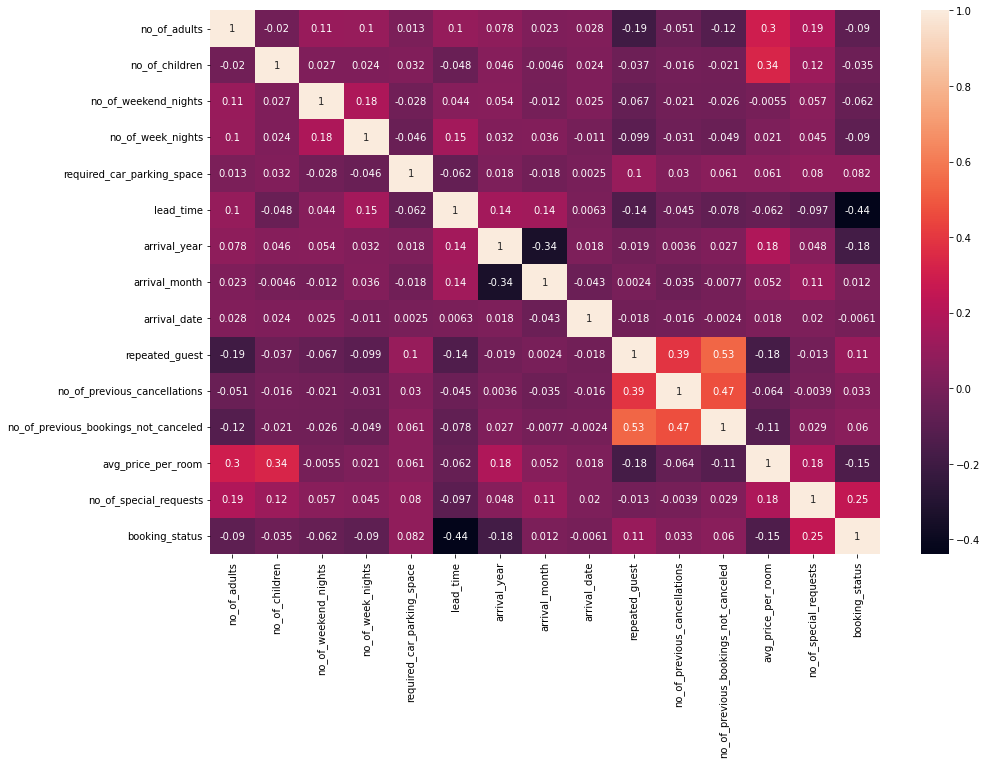

In [26]:
#Checking the correlations between the variables and booking status
plt.figure(figsize=(15,10))
sns.heatmap(hotel_data2.corr(), annot=True)
#No correlations between any of the variables and the booking status, except a little correlation was shown between the n0_of_special_orders and booking status.

In [27]:
#To count the number of 'cancelled' and 'Not cancelled' status
a= hotel_data2['booking_status'].value_counts() 
a

1    21937
0    10690
Name: booking_status, dtype: int64

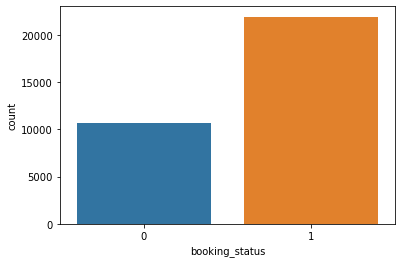

In [28]:
#Visualizing the counts
sns.countplot(x='booking_status', data=hotel_data2) 
plt.show()
#The count of 'Not cancelled'=1 is more than those of 'Cancelled'=0

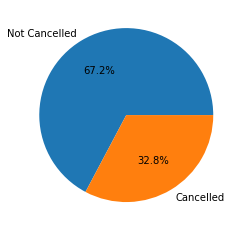

In [29]:
#Using piechart to show the percentages of the booking status
labels=['Not Cancelled', 'Cancelled']
plt.pie(a, labels=labels, autopct='%1.1f%%')
plt.show()

In [30]:
#To know the counts of meal_plan
Q=pd.DataFrame(hotel_data2.groupby('type_of_meal_plan').booking_status.value_counts())
Q        #To know the value_counts of  each meal_plan with respect to the booking status
#Meal plan 1 has the highest count with Meal plan 3 having the lowest

booking_status
type_of_meal_plan booking_status                
Meal Plan 1       1                        17319
                  0                         7836
Meal Plan 2       1                         1579
                  0                         1344
Meal Plan 3       1                            4
                  0                            1
Not Selected      1                         3035
                  0                         1509

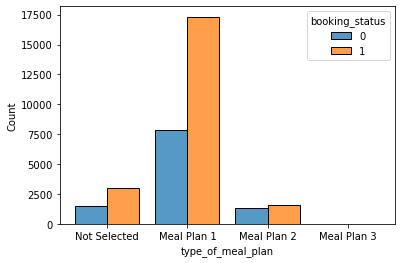

In [31]:
#Visualizing type_of_meal_plan with respect to booking_status
sns.histplot(x="type_of_meal_plan", data=hotel_data2, hue='booking_status', multiple='dodge', shrink= .8)
plt.show()  
#Meal plan 1 has the highest count for both 'Cancelled' and 'Not cancelled' with the 'Not Cancelled' higher
#Meal Plan 33 has a very low count so its kind of absent on the chart

In [32]:
#No of special requests with respect to booking status
pd.DataFrame(hotel_data2.groupby('no_of_special_requests').booking_status.value_counts()) 
#Those with more than 2 special requests did 'Not Cancel' their bookings, means the hotel is capable of meeting special requests

booking_status
no_of_special_requests booking_status                
0.0                    1                        10344
                       0                         7746
1.0                    1                         7607
                       0                         2388
2.0                    1                         3323
                       0                          556
3.0                    1                          585
4.0                    1                           70
5.0                    1                            8

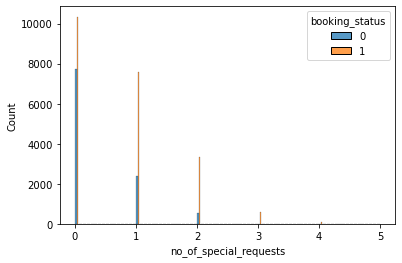

In [33]:
sns.histplot(x="no_of_special_requests", data=hotel_data2, hue='booking_status', multiple='dodge', shrink= .8)
plt.show()
#Visualizing number of special requests with respect to booking_status

In [34]:
# Number of counts of room type with respect to booking status
pd.DataFrame(hotel_data2.groupby('room_type_reserved').booking_status.value_counts())
#Room type 1 has the highest count and room type 3 has the least count

booking_status
room_type_reserved booking_status                
Room_Type 1        1                        17220
                   0                         8196
Room_Type 2        1                          411
                   0                          204
Room_Type 3        1                            3
                   0                            2
Room_Type 4        1                         3533
                   0                         1826
Room_Type 5        1                          166
                   0                           66
Room_Type 6        1                          497
                   0                          365
Room_Type 7        1                          107
                   0                           31

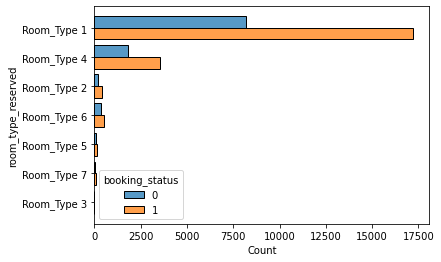

In [35]:
#Visualizing
sns.histplot(y="room_type_reserved", data=hotel_data2, hue='booking_status', multiple='dodge', shrink= .8)
plt.show()
#Room_type 3 seems to have the least booking despite having the lowest average price per booking, there is need to improve the room

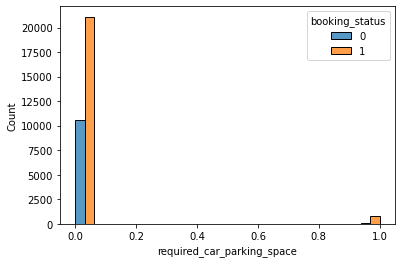

In [36]:
sns.histplot(x="required_car_parking_space", data=hotel_data2, hue='booking_status', multiple='dodge')
plt.show()

In [37]:
hotel_data2.groupby('market_segment_type').booking_status.count()
#Online market segment type has the highest number of counts with respect to booking status, while Aviation has the least

market_segment_type
Aviation           117
Complementary      353
Corporate         1782
Offline           9261
Online           21114
Name: booking_status, dtype: int64

In [38]:
hotel_data2.groupby('market_segment_type').booking_status.value_counts()
#Complimentary market_segment_type has no booking that was cancelled

market_segment_type  booking_status
Aviation             1                    82
                     0                    35
Complementary        1                   353
Corporate            1                  1594
                     0                   188
Offline              1                  6486
                     0                  2775
Online               1                 13422
                     0                  7692
Name: booking_status, dtype: int64

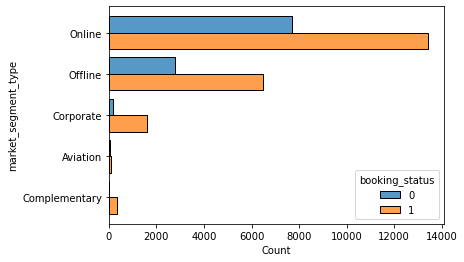

In [39]:
sns.histplot(y="market_segment_type", data=hotel_data2, hue='booking_status', multiple='dodge', shrink=.8)
plt.show()
#To visualize the market_segment_type with respect to booking status

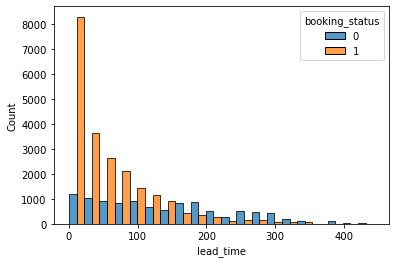

In [40]:
#To show the relationship between lead time and booking status
sns.histplot(x="lead_time", data=hotel_data2, hue='booking_status', multiple='dodge', bins=20)
plt.show()
#From this visualization, the likelihood of 'Not-cancelled' decreases as the lead-time increases

In [41]:
#Exploring repeated-guests
hotel_data2['repeated_guest'].unique()

array([0., 1.])

In [42]:
hotel_data2.groupby('repeated_guest').booking_status.value_counts()
#There are more new customers than old customers

repeated_guest  booking_status
0.0             1                 21101
                0                 10675
1.0             1                   836
                0                    15
Name: booking_status, dtype: int64

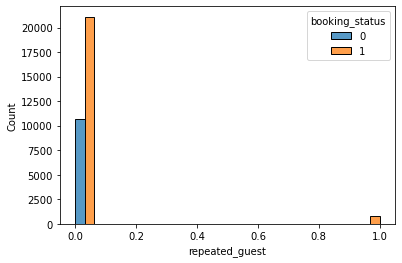

In [43]:
#Visualizing the effect of repeated guest on booking status
sns.histplot(x="repeated_guest", data=hotel_data2, hue='booking_status', multiple='dodge')
plt.show()
#From the plot,new customers tend to cancel their bookings compared to those that have visited once

### Preparing the data for modelling and prediction

In [44]:
#Dealing with categorical columns
categorical = [var for var in hotel_data2.columns if hotel_data2[var].dtype=='O']

print('There are {} categorical variabes \n'.format(len(categorical)))

print('They are: ', categorical)

There are 3 categorical variabes 

They are:  ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']


In [45]:
#Creating a dummy for the categorical data
hotel_data3= hotel_data2.drop(hotel_data2[hotel_data2['type_of_meal_plan']=='Meal Plan 3'].index)
hotel_data3['type_of_meal_plan'].unique()

array(['Not Selected', 'Meal Plan 1', 'Meal Plan 2'], dtype=object)

In [46]:
type_of_meal_plan = pd.get_dummies(hotel_data3.type_of_meal_plan, dummy_na=True)
type_of_meal_plan

,Meal Plan 1,Meal Plan 2,Not Selected,NaN
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
5,0,1,0,0
...,...,...,...,...
36269,1,0,0,0
36271,1,0,0,0
36272,1,0,0,0
36273,0,0,1,0


In [47]:
room_type_reserved= pd.get_dummies(hotel_data3.room_type_reserved, dummy_na=True)
room_type_reserved

,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7,NaN
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
36269,0,0,0,0,0,1,0,0
36271,1,0,0,0,0,0,0,0
36272,1,0,0,0,0,0,0,0
36273,1,0,0,0,0,0,0,0


In [48]:
market_segment_type = pd.get_dummies(hotel_data3.market_segment_type, dummy_na=True)
market_segment_type

,Aviation,Complementary,Corporate,Offline,Online,NaN
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
...,...,...,...,...,...,...
36269,0,0,0,0,1,0
36271,0,0,0,0,1,0
36272,0,0,0,0,1,0
36273,0,0,0,0,1,0


In [49]:
numerical = [var for var in hotel_data3.columns if hotel_data2[var].dtype!='O']

print('There are {} numerical variabes \n'.format(len(numerical)))

print('They are: ', numerical)

There are 15 numerical variabes 

They are:  ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status']


In [50]:
#split data into target and feature

X = hotel_data3.drop(['booking_status'], axis =1)
y= hotel_data3['booking_status']

In [51]:
#split into test and train data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)

In [52]:
#check the shapeof our split 

X_train.shape, X_test.shape

((26097, 17), (6525, 17))

In [53]:
X_train.dtypes

no_of_adults                            float64
no_of_children                          float64
no_of_weekend_nights                    float64
no_of_week_nights                       float64
type_of_meal_plan                        object
required_car_parking_space              float64
room_type_reserved                       object
lead_time                               float64
arrival_year                            float64
arrival_month                           float64
arrival_date                            float64
market_segment_type                      object
repeated_guest                          float64
no_of_previous_cancellations            float64
no_of_previous_bookings_not_canceled    float64
avg_price_per_room                      float64
no_of_special_requests                  float64
dtype: object

In [54]:
numerical = [col for col in X_train.columns if X_train[col].dtypes !='O']
numerical

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [55]:
categorical = [col for col in X_train.columns if X_train[col].dtypes =='O']
categorical

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

In [56]:
X_train = pd.concat([X_train[numerical], 
                    pd.get_dummies(X_train.type_of_meal_plan), 
                    pd.get_dummies(X_train.market_segment_type), 
                    pd.get_dummies(X_train.room_type_reserved)], 
                   axis =1)
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Meal Plan 1,Meal Plan 2,Not Selected,Aviation,Complementary,Corporate,Offline,Online,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
25500,3.0,0.0,2.0,1.0,0.0,85.0,2018.0,6.0,26.0,0.0,0.0,0.0,134.70,2.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
17516,2.0,0.0,0.0,3.0,0.0,259.0,2018.0,5.0,5.0,0.0,0.0,0.0,90.00,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
31678,1.0,0.0,1.0,1.0,0.0,3.0,2017.0,8.0,10.0,0.0,0.0,0.0,75.00,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6766,2.0,0.0,1.0,4.0,1.0,161.0,2018.0,11.0,28.0,0.0,0.0,0.0,94.00,3.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
17323,3.0,0.0,1.0,2.0,0.0,128.0,2018.0,7.0,11.0,0.0,0.0,0.0,116.32,2.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,2.0,0.0,2.0,3.0,0.0,192.0,2017.0,9.0,25.0,0.0,0.0,0.0,19.15,0.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0
21851,2.0,0.0,0.0,2.0,0.0,44.0,2018.0,11.0,18.0,0.0,0.0,0.0,83.39,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
10948,2.0,0.0,1.0,2.0,0.0,6.0,2017.0,9.0,21.0,0.0,0.0,0.0,114.00,0.0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
12010,2.0,0.0,0.0,2.0,0.0,103.0,2018.0,3.0,18.0,0.0,0.0,0.0,78.30,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [57]:
X_test = pd.concat([X_test[numerical], 
                    pd.get_dummies(X_test.type_of_meal_plan), 
                    pd.get_dummies(X_test.market_segment_type), 
                    pd.get_dummies(X_test.room_type_reserved)], 
                   axis =1)
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Meal Plan 1,Meal Plan 2,Not Selected,Aviation,Complementary,Corporate,Offline,Online,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
10852,2.0,0.0,0.0,2.0,0.0,265.0,2018.0,6.0,24.0,0.0,0.0,0.0,115.00,1.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
4788,1.0,0.0,1.0,2.0,0.0,9.0,2018.0,4.0,8.0,0.0,0.0,0.0,131.33,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
15165,1.0,0.0,1.0,2.0,0.0,80.0,2018.0,9.0,26.0,0.0,0.0,0.0,0.00,0.0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
27907,2.0,0.0,0.0,2.0,0.0,273.0,2017.0,7.0,17.0,0.0,0.0,0.0,109.00,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
14366,2.0,0.0,0.0,3.0,0.0,40.0,2018.0,5.0,17.0,0.0,0.0,0.0,140.40,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28526,1.0,0.0,0.0,2.0,0.0,68.0,2018.0,4.0,26.0,0.0,0.0,0.0,118.80,1.0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
19467,1.0,0.0,2.0,2.0,0.0,3.0,2018.0,9.0,18.0,0.0,0.0,0.0,110.00,0.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
21732,2.0,0.0,0.0,2.0,0.0,102.0,2017.0,10.0,16.0,0.0,0.0,0.0,109.00,0.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2809,2.0,0.0,1.0,2.0,0.0,78.0,2018.0,3.0,25.0,0.0,0.0,0.0,100.00,0.0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [58]:
cols = X_train.columns

In [59]:
#feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [60]:
X_train 

array([[0.75      , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [61]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Meal Plan 1,Meal Plan 2,Not Selected,Aviation,Complementary,Corporate,Offline,Online,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
0,0.75,0.0,0.333333,0.058824,0.0,0.191874,1.0,0.454545,0.833333,0.0,0.0,0.0,0.358722,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.50,0.0,0.000000,0.176471,0.0,0.584650,1.0,0.363636,0.133333,0.0,0.0,0.0,0.239680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.25,0.0,0.166667,0.058824,0.0,0.006772,0.0,0.636364,0.300000,0.0,0.0,0.0,0.199734,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.0,0.166667,0.235294,1.0,0.363431,1.0,0.909091,0.900000,0.0,0.0,0.0,0.250333,0.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.75,0.0,0.166667,0.117647,0.0,0.288939,1.0,0.545455,0.333333,0.0,0.0,0.0,0.309774,0.4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26092,0.50,0.0,0.333333,0.176471,0.0,0.433409,0.0,0.727273,0.800000,0.0,0.0,0.0,0.050999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26093,0.50,0.0,0.000000,0.117647,0.0,0.099323,1.0,0.909091,0.566667,0.0,0.0,0.0,0.222077,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26094,0.50,0.0,0.166667,0.117647,0.0,0.013544,0.0,0.727273,0.666667,0.0,0.0,0.0,0.303595,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26095,0.50,0.0,0.000000,0.117647,0.0,0.232506,1.0,0.181818,0.566667,0.0,0.0,0.0,0.208522,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X_test


array([[0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.5       , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.33333333, ..., 0.        , 0.        ,
        0.        ]])

In [63]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,Meal Plan 1,Meal Plan 2,Not Selected,Aviation,Complementary,Corporate,Offline,Online,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6,Room_Type 7
0,0.50,0.0,0.000000,0.133333,0.0,0.598194,1.0,0.454545,0.766667,0.0,0.0,0.0,0.212963,0.2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.0,0.166667,0.133333,0.0,0.020316,1.0,0.272727,0.233333,0.0,0.0,0.0,0.243204,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.25,0.0,0.166667,0.133333,0.0,0.180587,1.0,0.727273,0.833333,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.0,0.000000,0.133333,0.0,0.616253,0.0,0.545455,0.533333,0.0,0.0,0.0,0.201852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.50,0.0,0.000000,0.200000,0.0,0.090293,1.0,0.363636,0.533333,0.0,0.0,0.0,0.260000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6520,0.25,0.0,0.000000,0.133333,0.0,0.153499,1.0,0.272727,0.833333,0.0,0.0,0.0,0.220000,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6521,0.25,0.0,0.333333,0.133333,0.0,0.006772,1.0,0.727273,0.566667,0.0,0.0,0.0,0.203704,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6522,0.50,0.0,0.000000,0.133333,0.0,0.230248,0.0,0.818182,0.500000,0.0,0.0,0.0,0.201852,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6523,0.50,0.0,0.166667,0.133333,0.0,0.176072,1.0,0.181818,0.800000,0.0,0.0,0.0,0.185185,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modelling and predictions
###### For modelling and prediction we will use 
- Decision tree classifier
- Logistic Regression 

In [64]:
import warnings
warnings.filterwarnings("ignore")

### Decision tree model

In [65]:
#Import the library
from sklearn.tree import DecisionTreeClassifier

#define the model
decision = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state=0)
#fit the model
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [66]:
#Predicting the outcome
y_pred_decision = decision.predict(X_test)

In [67]:
#Testing the models accuracy using mean squared error because it is suited for outliers
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred_decision))
print('The Mean Absolute Error measures the average difference between predicted values and Actual Values')

0.26130268199233714
The Mean Absolute Error measures the average difference between predicted values and Actual Values


In [68]:
#Checking for the accuracy score
from sklearn.metrics import accuracy_score
print(f'The model accuracy score of the decision tree regressor {accuracy_score(y_test,y_pred_decision)}')

The model accuracy score of the decision tree regressor 0.7386973180076628


### Logistic Regression

In [69]:
#Importing Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [70]:
#Predicting X_test
y_pred_logreg = logreg.predict(X_test)

In [71]:
# model accuracy metrics for logistic regression


print('Training set score: ', logreg.score(X_train, y_train))

print('Test set score: ', logreg.score(X_test, y_test))


Training set score:  0.8044986013718052
Test set score:  0.775632183908046


#### The model is better then the Decision Tree Model,  but then it can be improved upon 

In [72]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred_logreg)
cm

array([[ 931, 1209],
       [ 255, 4130]], dtype=int64)

In [73]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.78      0.44      0.56      2140
           1       0.77      0.94      0.85      4385

    accuracy                           0.78      6525
   macro avg       0.78      0.69      0.70      6525
weighted avg       0.78      0.78      0.75      6525



### Summary
- From the above findings, we can conclude that the hotel services are relatively good, but can be improved upon.
- The Meal_Plan 1 and Room_Type 1 have the highest bookings in their categories respectively, and although a reasonable amount   of bookings on these two are also being 'Cancelled', the hotel should work on the other Room_Types and Meal_Plan to increase   bookings, this will increase chances of their bookings not being cancelled.
- The hotel should focus more on other forms of Market_Segments as they show a high ratio of 'Not cancelled' to 'Cancelled'       bookings especially the Complementary section.
- The longer the lead-time, the higher the chances of the booking being 'Cancelled'.
- Since the Online market_type brings in more bookings and also has the highest cancelled bookings, this segment should be       looked into and ways of preventing 'Cancelled' bookings should be put in place. 
- The Tree-decision Model gave an accuracy of 73.86%, while the Logistic Classifier gave an accuracy of 78%.
- Model can also be improved